In [18]:
from functools import reduce
import pandas as pd
import numpy as np
import itertools as itr
import math
import siuba
from siuba import _, mutate
import plotnine
from plotnine import aes, ggplot, geom_point
from siuba.data import cars, cars_sql

In [26]:
import plotnine as gg
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import numpy as np

def _check_plotnine_grid(plots_list, figsize):
    if not type(plots_list) == list:
        raise ValueError('Input plots_list is not a list')
    if (not type(figsize) == tuple) or (not len(figsize) == 2):
        raise ValueError('Input figsize should be a tuple of length 2')


def plotnine_grid(plots_list, row=None, col=1, height=None, width=None, dpi=500, ratio=None, pixels=10000,
                  figsize=(12, 8)):



    _check_plotnine_grid(plots_list, figsize)  # Check the input

    # Assign values that have not been provided based on others. In the end, height and width should be provided.
    if row is None:
        row = len(plots_list)

    if ratio is None:
        ratio = 1.5 * col / row

    if height is None and width is not None:
        height = ratio * width

    if height is not None and width is None:
        width = height / ratio

    if height is None and width is None:
        area = pixels / dpi
        width = np.sqrt(area/ratio)
        height = ratio * width

    # Do actual subplot creation and plot output.
    i = 1
    fig = plt.figure(figsize=figsize)
    plt.autoscale(tight=True)
    for image_sel in plots_list:  # image_sel = plots_list[i]
        image_sel.save('image' + str(i) + '.png', height=height, width=width, dpi=500, verbose=False)
        fig.add_subplot(row, col, i)
        plt.imshow(img.imread('image' + str(i) + '.png'), aspect='auto')
        fig.tight_layout()
        fig.get_axes()[i-1].axis('off')
        i = i + 1
        os.unlink('image' + str(i - 1) + '.png')  # os.unlink is basically os.remove but in some cases quicker
        fig.patch.set_visible(False)
    return fig

In [20]:
seed = 1335
n = 50
rn_g = np.random.default_rng(seed)
x = rn_g.normal(loc=0.0, scale =1, size =n)
y = x + rn_g.normal(loc=0.0,scale = 1, size =n)
df = pd.DataFrame({'x':x, 'y':y})
df=(
df >>
    mutate(z= _.x + _.y) >>
    mutate(up = _.x > _.y)
)
df.head()

,x,y,z,up
0,-0.863825,-2.278823,-3.142648,True
1,-0.042430,-0.576620,-0.619050,True
2,-0.298208,-0.657312,-0.955519,True
3,0.577730,0.402440,0.980170,True
4,0.493105,-0.340730,0.152376,True


In [27]:
plt1 = (
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() 
)
plt2 = (
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() 
)

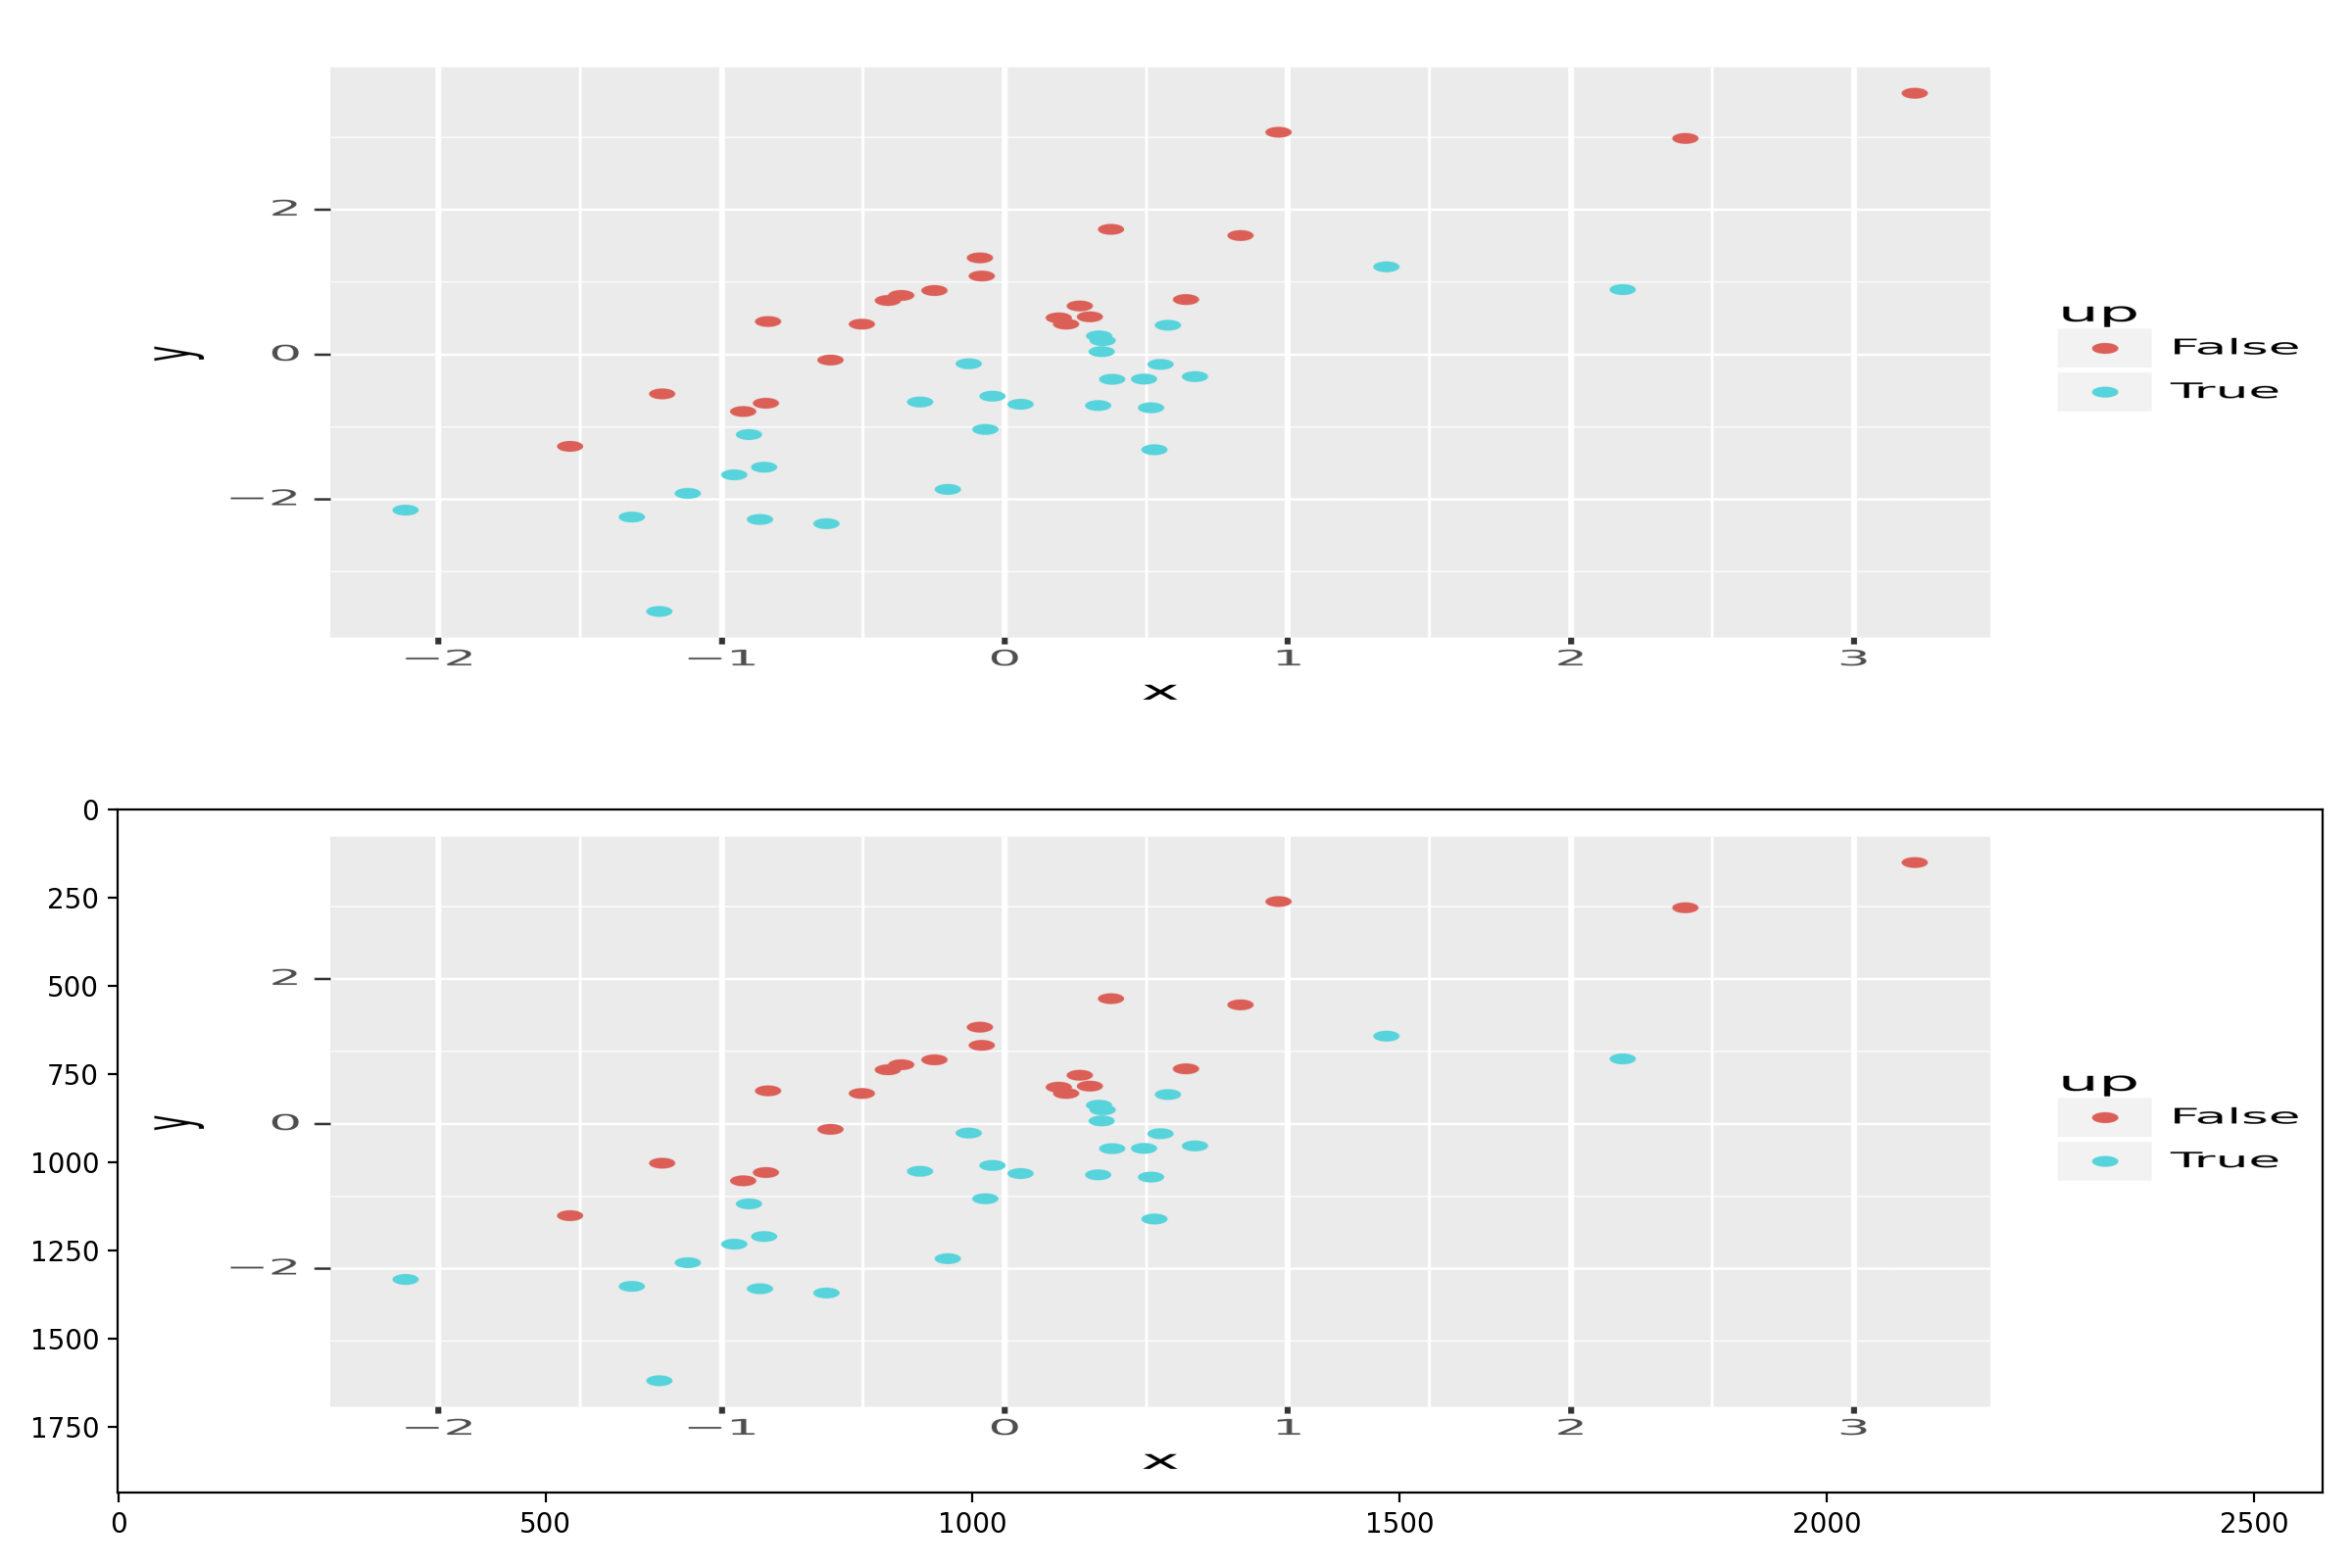

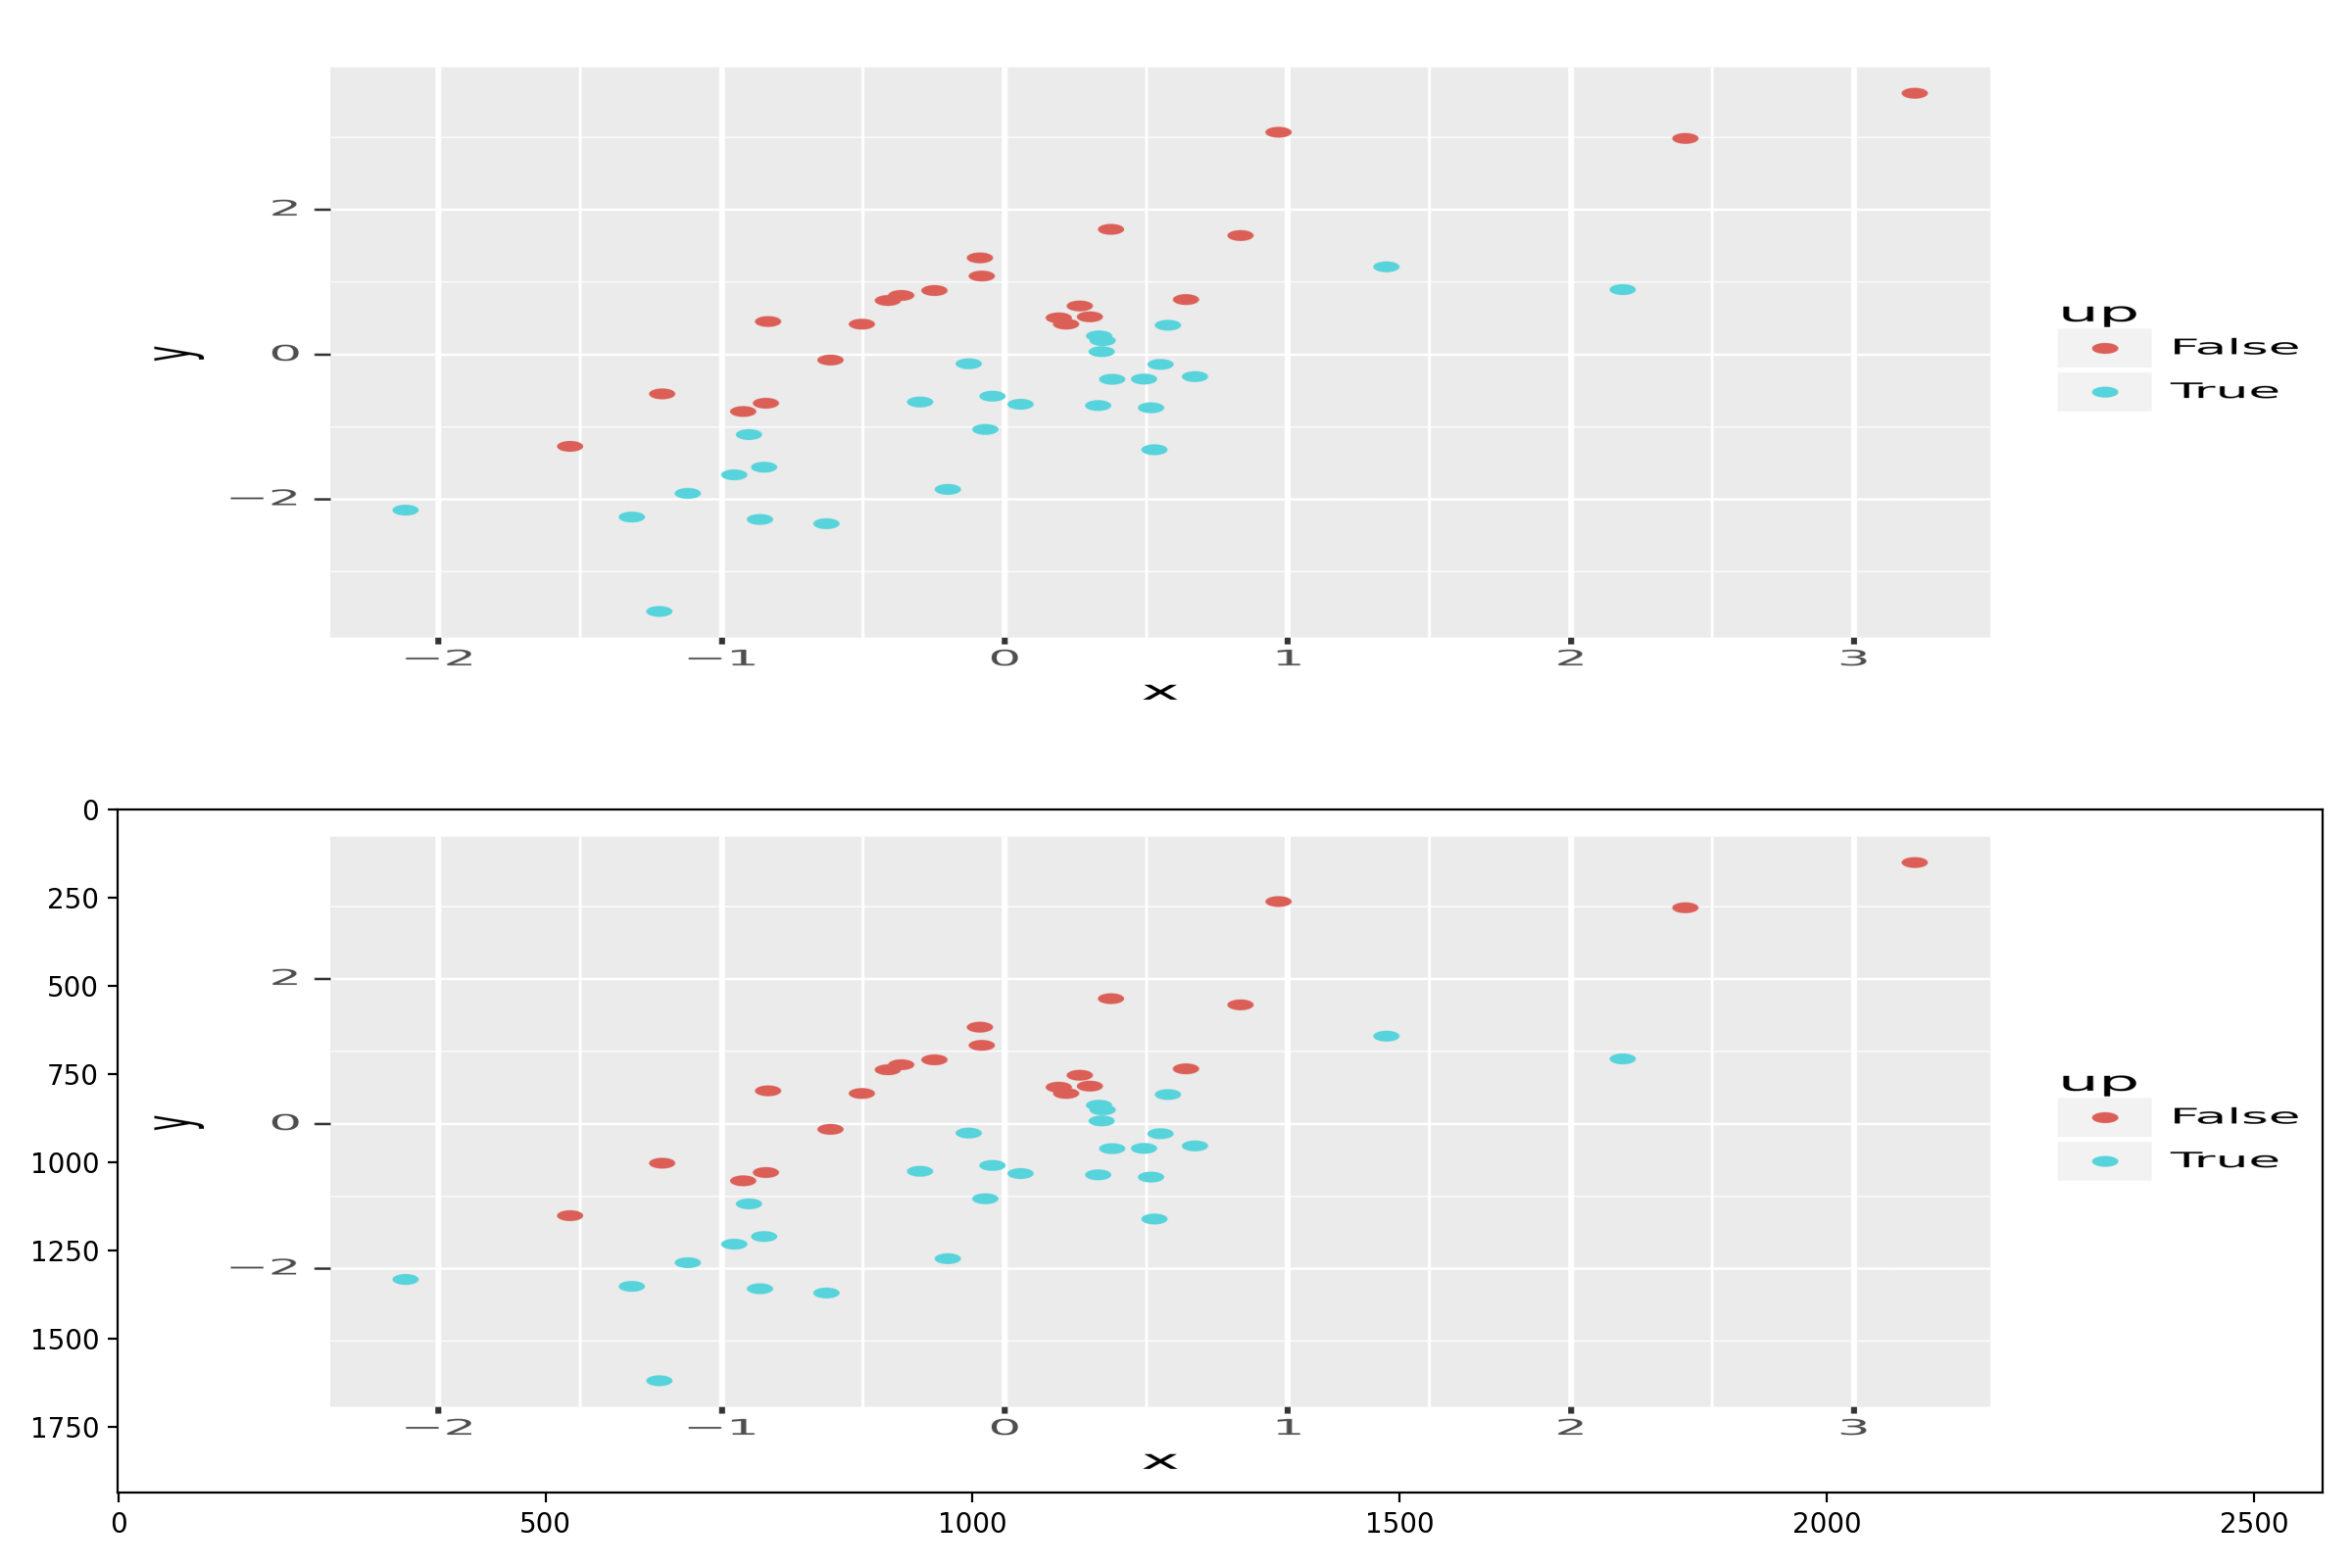

In [32]:
plt_list = [plt1,plt2]
plotnine_grid(plt_list, row=2, col=1, figsize=(12, 8))

In [ ]:
fig = plt.figure()
fig.add